第九章 图像梯度
主要内容：
Sobel理论基础
Sobel算子及函数使用
Scharr算子及函数使用
Sobel算子与Scharr算子的比较
Laplacian算子及函数使用
算子总结

图像梯度计算的是图像变化的速度。对于图像的边缘部分，其灰度值的变化较大，梯度值也较大
严格来说，梯度值需要求导，但图像梯度一般通过计算像素值的差来得到梯度的近似值

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def show(img):
    #picture_name_full = picture_name + ".jpg"
    #img = cv2.imread(picture_name_full)
    img = img[:,:,(2,1,0)]                # opencv中的通道顺序是BGR，与Python的RGB刚好相反。因此此处需要调整顺序。
    img2 = img[:,:,::-1]                  # 必须为 ::-1
    plt.imshow(img)

Sobel算子理论基础
Sobel算子是一种离散的微分算子，结合了高斯平滑和微分求导运算。利用局部差分寻找边缘，计算所得的是一个梯度的近似值。
水平方向偏导数的近似值、垂直方向偏导数的近似值 有其计算公式，但不是很好记忆
使用 cv2.Sobel() 函数，具体语法格式如下
dst = cv2.Sobel(src,ddepth,dx,dy[,ksize[,scale[,delta[,borderType]]]])
dx : x方向上的求导阶数
dy : y方向上的求导阶数
ksize : 代表Sobel核的大小。该值为-1时，采用Scharr算子
scale: 计算导数值时所采用的缩放因子，默认情况下是1，是没有缩放的
delta : 代表加在目标图像dst上的值，默认为0

PS：ddepth 一般设置为 cv2.CV_64F,防止负数被自动截断成0；
   为了正确显示偏导数的值，一般要取绝对值。
   
dst = cv2.convertScaleAbs(src[,alpha[,beta]])  对参数取绝对值
alpha : 调节系数，默认为1；
beta ： 调节亮度值，默认为0；

上述函数将src转为256色位图，也可以使用
dst = saturate(src * alpha +beta);该函数原理同cpp中的saturate函数

关于求导方向：
1. dst = cv2.Sobel(src,ddepth,1,0)表示只计算x方向梯度，即dx=1(任何大于1的数都行),dy=0;
2. dst = cv2.Sobel(src,ddepth,0,1)表示只计算y方向梯度
3. dst = cv2.Sobel(src,ddepth,1,1)表示获取两个方向信息

4. dx = cv2.Sobel(src,ddepth,1,0)
   dy = cv2.Sobel(src,ddepth,0,1)
    dst = cv2.addWeighted(src1,alpha,src2,beta,gamma)代表x方向与y方向的叠加

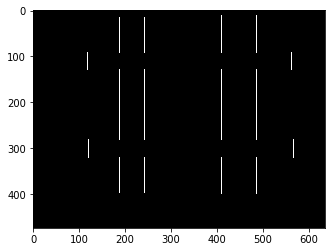

In [2]:
o = cv2.imread("Sobel4.bmp")
Sobelx = cv2.Sobel(o,cv2.CV_64F,1,0)
Sobelx = cv2.convertScaleAbs(Sobelx)
Sobely = cv2.Sobel(o,cv2.CV_64F,0,1)
Sobely = cv2.convertScaleAbs(Sobely)

#plt.subplot(131),show(o)
#plt.subplot(132),
plt.imshow(Sobelx) #同时输出多幅图像时，由于图像太小会失真
#plt.subplot(133),show(Sobely)

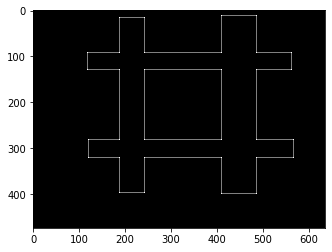

In [3]:
o = cv2.imread("Sobel4.bmp")
Sobelx = cv2.Sobel(o,cv2.CV_64F,1,0)
Sobely = cv2.Sobel(o,cv2.CV_64F,0,1)
Sobelx = cv2.convertScaleAbs(Sobelx)
Sobely = cv2.convertScaleAbs(Sobely)
Sobelxy = cv2.addWeighted(Sobelx,0.5,Sobely,0.5,0)
show(Sobelxy)

Scharr算子及函数使用
Scharr算子有时更加精确，Gx与Gy也有固定的算法，不好记忆
dst = cv2.Scharr(src,ddepth,dx,dy[,scale[,delta[,borderType]]])
或者可以使用Sobel算子在ksize=-1的情况
dst = cv2.Sobel(src,ddepth,dx,dy,-1)
需要注意的是，Scharr算子要求dx与dy满足：
dx >= 0 && dy >= 0 && dx+dy==1

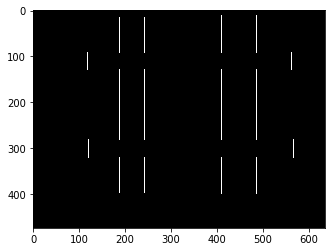

In [5]:
o = cv2.imread("Scharr.bmp")
scharrx = cv2.Scharr(o,cv2.CV_64F,1,0)
scharrx = cv2.convertScaleAbs(scharrx)
show(scharrx)

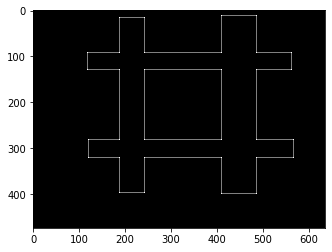

In [8]:
o = cv2.imread("Scharr.bmp")
scharrx = cv2.Scharr(o,cv2.CV_64F,1,0)
scharry = cv2.Scharr(o,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)
show(scharrxy)

(<matplotlib.axes._subplots.AxesSubplot at 0x16660633748>, None)

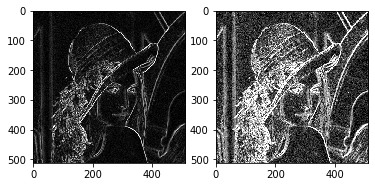

In [9]:
#Sobel算子与Scharr算子的比较
o = cv2.imread("lena.bmp")  #是一张灰度图
Sobelx = cv2.Sobel(o,cv2.CV_64F,1,0)
Sobely = cv2.Sobel(o,cv2.CV_64F,0,1)
Sobelx = cv2.convertScaleAbs(Sobelx)
Sobely = cv2.convertScaleAbs(Sobely)
Sobelxy = cv2.addWeighted(Sobelx,0.5,Sobely,0.5,0)
scharrx = cv2.Scharr(o,cv2.CV_64F,1,0)
scharry = cv2.Scharr(o,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)
plt.subplot(121),show(Sobelxy)
plt.subplot(122),show(scharrxy)

Laplacian算子及函数使用
Laplacian算子是一种二阶导数算子，其具有旋转不变性，可以满足不同方向的图像边缘锐化。通常情况下，其算子的系数之和需要为0.
dst = cv2.Laplacian(src,ddepth[,ksize[,scale[,delta[,borderType]]]])
ksize: 用于计算二阶导数的核的尺寸大小，必须是正的奇数
通过从图像内减去他的Laplacian图像，可以增强图像的对比度，此时可以用另一个算子来计算。

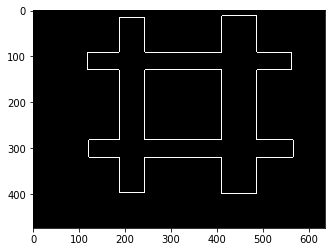

In [10]:
o = cv2.imread('Laplacian.bmp')
la = cv2.Laplacian(o,cv2.CV_64F)
la = cv2.convertScaleAbs(la)
show(la)

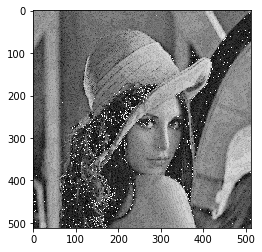

In [11]:
#测试 原图像-Laplacian图像
o = cv2.imread("lena.bmp")  #是一张灰度图
la = cv2.Laplacian(o,cv2.CV_64F)
la = cv2.convertScaleAbs(la)
test = o - la
show(test)